In [193]:
#RICE_QUALITY_DETECTION_USING_IMAGE_PROCESSING AND DATA VIZUALIZATION
 #IMPORTING DATASETS
import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.graph_objects as go
from plotly import subplots
import pandas as pd
import plotly.express as px
import numpy as np
from dash.dependencies import Input, Output, State
import cv2
import PIL.Image as image
from io import BytesIO
import base64
from matplotlib import pyplot as plt
app = dash.Dash(__name__)

In [194]:
#classification of rice particals
def get_classification(ratio):
    ratio =round(ratio,1)
    toret=""
    if(ratio>=3 and ratio<3.5):
        toret="Slender"
    elif(ratio>=2.1 and ratio<3):
        toret="Medium"
    elif(ratio>=1.1 and ratio<2.1):
        toret="Bold"
    elif(ratio>0.9 and ratio<=1):
        toret="Round"
    else:
        toret="Dust"
    return toret

In [195]:
#initialisig the values
classification = {"Slender":0, "Medium":0, "Bold":0, "Round":0, "Dust":0}
avg = {"Slender":0, "Medium":0, "Bold":0, "Round":0, "Dust":0}

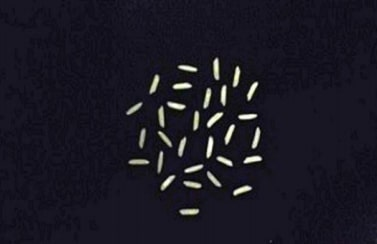

In [196]:
#load in greyscale mode
from IPython.display import display, Image
img = cv2.imread("C:/Users/Garima/OneDrive/Research Methodology/Git Folder to be committed/G2_3.jpg",0)
display(Image(filename='C:/Users/Garima/OneDrive/Research Methodology/Git Folder to be committed/G2_3.jpg'))

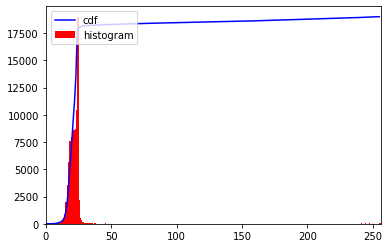

In [197]:
#histogram part of the image
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('C:/Users/Garima/OneDrive/Research Methodology/Git Folder to be committed/G2_3.jpg',0)

hist,bins = np.histogram(img.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
#plt.show()

In [198]:
#convert into binary
# 160 - threshold, 255 - value to assign, THRESH_BINARY_INV - Inverse binary
ret,binary = cv2.threshold(img,160,255,cv2.THRESH_BINARY)

In [199]:
#averaging filter
kernel = np.ones((5,5),np.float32)/9
dst = cv2.filter2D(binary,-1,kernel)
# -1 : depth of the destination image
kernel2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))

In [200]:
#erosion
erosion = cv2.erode(dst,kernel2,iterations = 1)

In [201]:
#dilation
dilation = cv2.dilate(erosion,kernel2,iterations = 1)

In [202]:
#edge detection
edges = cv2.Canny(dilation,100,200)

In [203]:
#size detection
contours, hierarchy = cv2.findContours(erosion, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print("No. of rice grains=",len(contours))
total_ar=0

No. of rice grains= 30


In [204]:
#counting impurities
for cnt in contours:
    x,y,w,h = cv2.boundingRect(cnt)
    aspect_ratio = float(w)/h
    if(aspect_ratio<1):
        aspect_ratio=1/aspect_ratio
    #print(round(aspect_ratio,2),get_classification(aspect_ratio))
    classification[get_classification(aspect_ratio)] += 1
    if get_classification(aspect_ratio) != "Dust":
        total_ar+=aspect_ratio
    if get_classification(aspect_ratio) != "Dust":
        avg[get_classification(aspect_ratio)] += aspect_ratio

In [205]:
#getting the average value
avg_ar=total_ar/len(contours)

In [206]:
#setting the values for classification of rice
if classification['Slender']!=0:
    avg['Slender'] = avg['Slender']/classification['Slender']
if classification['Medium']!=0:
    avg['Medium'] = avg['Medium']/classification['Medium']
if classification['Bold']!=0:
    avg['Bold'] = avg['Bold']/classification['Bold']
if classification['Round']!=0:
    avg['Round'] = avg['Round']/classification['Round']

In [207]:
#saving different types of images
cv2.imwrite("C:/Users/Garima/OneDrive/Research Methodology/Quality-Analysis-and-Classification-of-Rice-Grains-master/exp/img.jpg", img)
cv2.imwrite("C:/Users/Garima/OneDrive/Research Methodology/Quality-Analysis-and-Classification-of-Rice-Grains-master/exp/binary.jpg", binary)
cv2.imwrite("C:/Users/Garima/OneDrive/Research Methodology/Quality-Analysis-and-Classification-of-Rice-Grains-master/exp/dst.jpg", dst)
cv2.imwrite("C:/Users/Garima/OneDrive/Research Methodology/Quality-Analysis-and-Classification-of-Rice-Grains-master/exp/erosion.jpg", erosion)
cv2.imwrite("C:/Users/Garima/OneDrive/Research Methodology/Quality-Analysis-and-Classification-of-Rice-Grains-master/exp/dilation.jpg", dilation)
cv2.imwrite("C:/Users/Garima/OneDrive/Research Methodology/Quality-Analysis-and-Classification-of-Rice-Grains-master/exp/edges.jpg", edges)

True

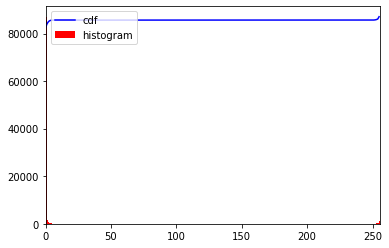

In [208]:
#histogram part for the edge part of the image
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('C:/Users/Garima/OneDrive/Research Methodology/Quality-Analysis-and-Classification-of-Rice-Grains-master/exp/edges.jpg',0)

hist,bins = np.histogram(img.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

In [209]:
#converting rgb to bgr
def readb64(base64_string):
    sbuf = BytesIO()
    sbuf.write(base64.b64decode(base64_string))
    pimg = image.open(sbuf)
    return cv2.cvtColor(np.array(pimg), cv2.COLOR_RGB2BGR)

In [210]:
#updating the image
def update_image(pic):
    img = readb64(pic)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    classification1 = {"Slender":0, "Medium":0, "Bold":0, "Round":0, "Dust":0}
    avg1 = {"Slender":0, "Medium":0, "Bold":0, "Round":0, "Dust":0}
    #convert into binary
    ret,binary = cv2.threshold(img,160,255,cv2.THRESH_BINARY)# 160 - threshold, 255 - value to assign, THRESH_BINARY_INV - Inverse binary
    #averaging filter
    kernel = np.ones((5,5),np.float32)/9
    dst = cv2.filter2D(binary,-1,kernel)# -1 : depth of the destination image

    kernel2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))

    #erosion
    erosion = cv2.erode(dst,kernel2,iterations = 1)

    #dilation
    dilation = cv2.dilate(erosion,kernel2,iterations = 1)

    #edge detection
    edges = cv2.Canny(dilation,100,200)
   
    
    contours, hierarchy = cv2.findContours(erosion, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    #print("No. of rice grains=",len(contours))
    total_ar1=0
    for cnt in contours:
        x,y,w,h = cv2.boundingRect(cnt)
        aspect_ratio = float(w)/h
        if(aspect_ratio<1):
            aspect_ratio=1/aspect_ratio
        print(round(aspect_ratio,2),get_classification(aspect_ratio))
        classification1[get_classification(aspect_ratio)] += 1
        if get_classification(aspect_ratio) != "Dust":
            total_ar1+=aspect_ratio
        if get_classification(aspect_ratio) != "Dust":
            avg1[get_classification(aspect_ratio)] += aspect_ratio
    avg_ar1=total_ar1/len(contours)
    if classification1['Slender']!=0:
        avg1['Slender'] = avg1['Slender']/classification1['Slender']
    if classification1['Medium']!=0:
        avg1['Medium'] = avg1['Medium']/classification1['Medium']
    if classification1['Bold']!=0:
        avg1['Bold'] = avg1['Bold']/classification1['Bold']
    if classification1['Round']!=0:
        avg1['Round'] = avg1['Round']/classification1['Round']
    cv2.imwrite("C:/Users/Garima/OneDrive/Research Methodology/Quality-Analysis-and-Classification-of-Rice-Grains-master/exp/img1.jpg", img)
    cv2.imwrite("C:/Users/Garima/OneDrive/Research Methodology/Quality-Analysis-and-Classification-of-Rice-Grains-master/exp/binary1.jpg", binary)
    cv2.imwrite("C:/Users/Garima/OneDrive/Research Methodology/Quality-Analysis-and-Classification-of-Rice-Grains-master/exp/dst1.jpg", dst)
    cv2.imwrite("C:/Users/Garima/OneDrive/Research Methodology/Quality-Analysis-and-Classification-of-Rice-Grains-master/exp/erosion1.jpg", erosion)
    cv2.imwrite("C:/Users/Garima/OneDrive/Research Methodology/Quality-Analysis-and-Classification-of-Rice-Grains-master/exp/dilation1.jpg", dilation)
    cv2.imwrite("C:/Users/Garima/OneDrive/Research Methodology/Quality-Analysis-and-Classification-of-Rice-Grains-master/exp/edges1.jpg", edges)
    return classification1,avg1,avg_ar1

In [211]:


### Size detection
contours,hierarchy = cv2.findContours(erosion, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print("Total No of garins is=")
print (len(contours))
total_ar=0
for cnt in contours:
	x,y,w,h = cv2.boundingRect(cnt)
	aspect_ratio = float(w)/h
	if(aspect_ratio<1):
		aspect_ratio=1/aspect_ratio
	print (round(aspect_ratio,2),get_classification(aspect_ratio))
	total_ar+=aspect_ratio
avg_ar=total_ar/len(contours)
print ("Average Aspect Ratio=",round(avg_ar,2),get_classification(avg_ar))


Total No of garins is=
30
3.17 Slender
1.73 Bold
2.38 Medium
1.07 Bold
1.14 Bold
2.11 Medium
4.0 Dust
1.45 Bold
2.11 Medium
3.5 Dust
2.22 Medium
2.75 Medium
1.14 Bold
2.57 Medium
2.2 Medium
1.91 Bold
2.86 Medium
1.06 Bold
3.17 Slender
3.0 Slender
2.38 Medium
1.15 Bold
2.33 Medium
3.0 Slender
2.38 Medium
1.82 Bold
1.73 Bold
2.62 Medium
2.86 Medium
3.14 Slender
Average Aspect Ratio= 2.3 Medium


In [212]:
def get_image(path):
    img=image.open(path)
    # Constants
    img_width = 710
    img_height = 550
    scale_factor = 0.5
    fig = go.Figure()
    fig.add_trace(
        go.Scatter(
            x=[0, img_width * scale_factor],
            y=[0, img_height * scale_factor],
            mode="markers",
            marker_opacity=0
        )
    )
    fig.update_xaxes(
        visible=False,
        range=[0, img_width * scale_factor]
    )
    fig.update_yaxes(
        visible=False,
        range=[0, img_height * scale_factor],
        scaleanchor="x"
    )
    fig.add_layout_image(
        dict(
            x=0,
            sizex=img_width * scale_factor,
            y=img_height * scale_factor,
            sizey=img_height * scale_factor,
            xref="x",
            yref="y",
            opacity=1.0,
            layer="below",
            sizing="stretch",
            source=img)
    )
    fig.update_layout(
        width=img_width * scale_factor,
        height=img_height * scale_factor,
        margin={"l": 0, "r": 0, "t": 0, "b": 0},
    )
    fig.show(config={'doubleClick': 'reset'})
    return fig


In [213]:
#average aspect vs classification plot
def get_plot1(classification = classification, avg = avg, avg_ar = avg_ar):
    fig = subplots.make_subplots(rows=1,cols=1,specs=[[{"type":"bar"}]], shared_xaxes=True)
    print(list(classification.keys()))
    print(list(classification.values()))
    plot1 = go.Bar(x=list(classification.keys()), y=list(classification.values()), name="Particles")
    plot2 = go.Bar(x=list(avg.keys()), y=list(avg.values()), name="Avg. Aspect Ratio")
    fig.add_trace(plot1,1,1)
    fig.add_trace(plot2,1,1)
    fig.add_shape(
        type="line",
        x0=0,
        y0=round(avg_ar,2),
        x1=5,
        y1=round(avg_ar,2),
        line=dict(
            color="LightSeaGreen",
            width=4,
            dash="dashdot",
        ),
    )
    fig.update_layout(
        width = 600,
        height = 350,
        margin = {"l": 5, "r": 5, "t": 30, "b": 5},
        title = "Average Aspect Ratio Vs Classification",
        template = "plotly_dark"
    )
    return fig

In [214]:
#quality annalysis
def get_plot2(classification = classification):
    fig = subplots.make_subplots(rows=1,cols=1,specs=[[{"type":"pie"}]])
    rice = sum(list(classification.values())) - classification['Dust']
    dust = classification['Dust']
    values = [rice, dust]
    labels = ["Rice", "Dust"]
    plot1 = go.Pie(labels=labels, values=values, hole=.3)
    fig.add_trace(plot1,1,1)
    fig.update_layout(
        width = 600,
        height = 350,
        margin = {"l": 65, "r": 5, "t": 60, "b": 50},
        title = "Quality Analysis",
        template = "plotly_dark"
    )
    
    return fig



['Slender', 'Medium', 'Bold', 'Round', 'Dust']
[5, 13, 10, 0, 2]



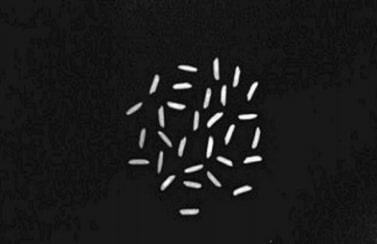


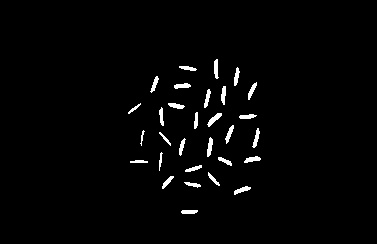


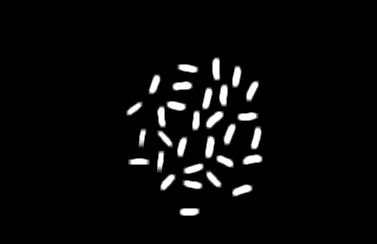


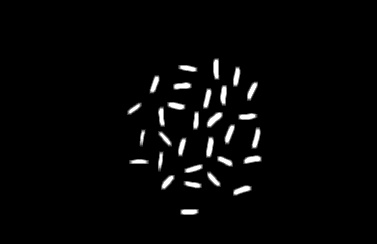


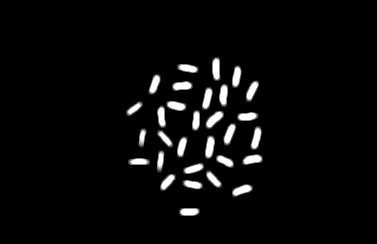


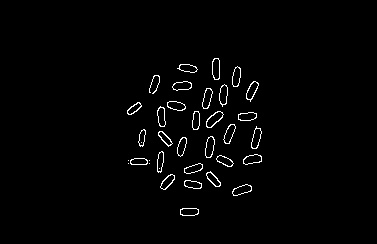

In [215]:
#
app.layout = html.Div([
	html.Div([
		html.Div([
			html.Img(
				src="logo.jpg",
				style={"height" : "40px", "width" : "40px", "border-radius":"20px"}
			)
		],style={"float":"left","padding" : "5px 0 5px 50px"}),
		html.Div(
			children="Classification and Quality Analysis of Rice",
			style={"float":"left","padding" : "10px 0 10px 10px","font-size": "17px", "font-weight" :"600"}
		),
		html.Div([
			html.Div([html.A("Home",href="#home")], style={"float":"left","padding":"0 10px 0 10px","align-items": "center","font-size": "15px", "font-weight" :"600"}),
			html.Div([html.A("About Project",href="#about-project")], style={"float":"left","padding":"0 10px 0 10px","align-items": "center","font-size": "15px", "font-weight" :"600"}),
			html.Div([html.A("About Us",href="#about-us")], style={"float":"left","padding":"0 10px 0 10px","align-items": "center","font-size": "15px", "font-weight" :"600"}),
			html.Div([html.A("Source Code",href="#bottom")], style={"float":"left","padding":"0 10px 0 10px","align-items": "center","font-size": "15px", "font-weight" :"600"}),
		],style={"float":"right", "padding": "10px 50px 10px 0px"})
	],className="nav"),
	html.Div([],style={"height":"50px"},id="home"),
	html.Div([
		html.H1(children="Visualisation of Results", style={"text-align":"center", "margin":"0", "padding-bottom" : "20px", "color" : "whitesmoke"}),
		html.Div([
			html.Div([
				dcc.Graph(figure=get_plot1(),id="graph1"),
				html.P("Original Image", style={"margin":"0","padding-bottom":"10px"})
			], style = {"display": "block", "justify-content": "center", "align-items": "center", "padding":"0 20px 0 20px"}),
			html.Div([
				dcc.Graph(figure=get_plot2(),id="graph2"),
				html.P("Binary Image", style={"margin":"0","padding-bottom":"10px"})
			], style = {"display": "block", "justify-content": "center", "align-items": "center", "padding":"0 20px 0 20px"}),
		], style = {"display": "flex", "justify-content": "center", "align-items": "center", "text-align":"center"}),
		html.Div([]),
		html.Div([
			html.Div([
				dcc.Upload([
					'Drag and Drop or ',
					html.A('Select a File')
				],
				style={
					'width': '100%',
					'height': '60px',
					'lineHeight': '60px',
					'borderWidth': '1px',
					'borderStyle': 'dashed',
					'borderRadius': '5px',
					'textAlign': 'center'
				}, id="upload-image"),
			], style = {"display": "block", "justify-content": "center", "align-items": "center", "padding":"0 20px 0 20px"}),
		], style = {"display": "flex", "justify-content": "center", "align-items": "center", "text-align":"center", "width" : "100%"})
	],style = {"color":"black", "padding" : "20px 0 20px 0", "color" : "whitesmoke"},id='plots'),
	html.Div([
		html.H1(children="Images", style={"text-align":"center", "margin":"0", "padding-bottom" : "20px"}),
		html.Div([
			html.Div([
				dcc.Graph(figure=get_image("C:/Users/Garima/OneDrive/Research Methodology/Quality-Analysis-and-Classification-of-Rice-Grains-master/exp/img.jpg"),id="img"),
				html.P("Original Image", style={"margin":"0","padding-bottom":"10px"})
			], style = {"display": "block", "justify-content": "center", "align-items": "center", "padding":"0 20px 0 20px"}),
			html.Div([
				dcc.Graph(figure=get_image("C:/Users/Garima/OneDrive/Research Methodology/Quality-Analysis-and-Classification-of-Rice-Grains-master/exp/binary.jpg"),id="binary"),
				html.P("Binary Image", style={"margin":"0","padding-bottom":"10px"})
			], style = {"display": "block", "justify-content": "center", "align-items": "center", "padding":"0 20px 0 20px"}),
			html.Div([
				dcc.Graph(figure=get_image("C:/Users/Garima/OneDrive/Research Methodology/Quality-Analysis-and-Classification-of-Rice-Grains-master/exp/dst.jpg"),id="dst"),
				html.P("Dust Image", style={"margin":"0","padding-bottom":"10px"})
			], style = {"display": "block", "justify-content": "center", "align-items": "center", "padding":"0 20px 0 20px"})
		], style = {"display": "flex", "justify-content": "center", "align-items": "center", "text-align":"center"}),
		html.Div([]),
		html.Div([
			html.Div([
				dcc.Graph(figure=get_image("C:/Users/Garima/OneDrive/Research Methodology/Quality-Analysis-and-Classification-of-Rice-Grains-master/exp/erosion.jpg"),id="erosion"),
				html.P("Erosion", style={"margin":"0","padding-bottom":"10px"})
			], style = {"display": "block", "justify-content": "center", "align-items": "center", "padding":"0 20px 0 20px"}),
			html.Div([
				dcc.Graph(figure=get_image("C:/Users/Garima/OneDrive/Research Methodology/Quality-Analysis-and-Classification-of-Rice-Grains-master/exp/dilation.jpg"),id="dilation"),
				html.P("Dilation", style={"margin":"0","padding-bottom":"10px"})
			], style = {"display": "block", "justify-content": "center", "align-items": "center", "padding":"0 20px 0 20px"}),
			html.Div([
				dcc.Graph(figure=get_image("C:/Users/Garima/OneDrive/Research Methodology/Quality-Analysis-and-Classification-of-Rice-Grains-master/exp/edges.jpg"),id="edges"),
				html.P("Edge Detection", style={"margin":"0","padding-bottom":"10px"})
			], style = {"display": "block", "justify-content": "center", "align-items": "center", "padding":"0 20px 0 20px"})
		], style = {"display": "flex", "justify-content": "center", "align-items": "center", "text-align":"center"})
	],style = {"color":"black", "background-color" : "lightsteelblue", "border-radius":"40px 40px 40px 40px", "padding" : "20px 0 20px 0"},id='images'),
	html.Div([
		html.H1(children="About Project", style={"text-align":"center"}),
		#html.P(children=text1),
		#html.P(children=text2),
		#html.P(children=text3),
		#html.P(children=text4),
		#html.P(children=text5),
		#html.P(children=text6),
	],style = {"color":"white", "padding":"10px 50px 10px 50px"},id="about-project")
])



In [216]:
#updating the outputs
def update_output(list_of_contents):
	if list_of_contents is not None:
		ind = str(list_of_contents).find(",")
		cla,av,av_ar = update_image(list_of_contents[ind:])
		return get_image("img1.jpg"), get_image("binary1.jpg"), get_image("dst1.jpg"), get_image("erosion1.jpg"), get_image("dilation1.jpg"), get_image("edges1.jpg"), get_plot1(cla, av, av_ar), get_plot2(cla)
	else:
		return get_image("img.jpg"), get_image("binary.jpg"), get_image("dst.jpg"), get_image("erosion.jpg"), get_image("dilation.jpg"), get_image("edges.jpg"), get_plot1(), get_plot2()


In [217]:
#hosting the website
if __name__ == '__main__':
	app.run_server(debug=False)

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app '__main__' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
127.0.0.1 - - [12/Aug/2021 11:53:30] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [12/Aug/2021 11:53:30] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [12/Aug/2021 11:53:30] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [12/Aug/2021 11:53:30] "GET /_dash-component-suites/dash_core_components/async-graph.js HTTP/1.1" 200 -
127.0.0.1 - - [12/Aug/2021 11:53:30] "GET /_dash-component-suites/dash_core_components/async-upload.js HTTP/1.1" 200 -
127.0.0.1 - - [12/Aug/2021 11:53:30] "GET /logo.jpg HTTP/1.1" 200 -
127.0.0.1 - - [12/Aug/2021 11:53:31] "GET /_dash-component-suites/dash_core_components/async-plotlyjs.js HTTP/1.1" 200 -
127.0.0.1 - - [12/Aug/2021 12:19:01] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [12/Aug/2021 12:19:02] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [12/Aug/2021 12:19:02] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [12/Aug/2021 12:19:02] "GET /_dash-component-suites/dash_core_components/async-g